In [3]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
races = pd.read_csv('data/ergast_data/races.csv', parse_dates=['date'])
races.tail(13)

,raceId,year,round,circuitId,name,date,time,url
1018,1031,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,https://en.wikipedia.org/wiki/2020_Austrian_Gr...
1019,1032,2020,2,70,Styrian Grand Prix,2020-07-12,13:10:00,https://en.wikipedia.org/wiki/2020_Styrian_Gra...
1020,1033,2020,3,11,Hungarian Grand Prix,2020-07-19,13:10:00,https://en.wikipedia.org/wiki/2020_Hungarian_G...
1021,1034,2020,4,9,British Grand Prix,2020-08-02,13:10:00,https://en.wikipedia.org/wiki/2020_British_Gra...
1022,1035,2020,5,9,70th Anniversary Grand Prix,2020-08-09,13:10:00,https://en.wikipedia.org/wiki/70th_Anniversary...
1023,1036,2020,6,4,Spanish Grand Prix,2020-08-16,13:10:00,https://en.wikipedia.org/wiki/2020_Spanish_Gra...
1024,1037,2020,7,13,Belgian Grand Prix,2020-08-30,13:10:00,https://en.wikipedia.org/wiki/2020_Belgian_Gra...
1025,1038,2020,8,14,Italian Grand Prix,2020-09-06,13:10:00,https://en.wikipedia.org/wiki/2020_Italian_Gra...
1026,1039,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...
1027,1040,2020,10,71,Russian Grand Prix,2020-09-27,11:10:00,https://en.wikipedia.org/wiki/2020_Russian_Gra...


In [11]:
laps = pd.read_csv('data/ergast_data/lap_times.csv')
laps

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
479386,1036,849,60,19,1:22.030,82030
479387,1036,849,61,19,1:22.422,82422
479388,1036,849,62,18,1:22.909,82909
479389,1036,849,63,18,1:23.479,83479


In [43]:
pd.read_csv('data/ergast_data/drivers.csv')

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
843,845,sirotkin,35,SIR,Sergey,Sirotkin,1995-08-27,Russian,http://en.wikipedia.org/wiki/Sergey_Sirotkin_(...
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
845,847,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...
846,848,albon,23,ALB,Alexander,Albon,1996-03-23,Thai,http://en.wikipedia.org/wiki/Alexander_Albon


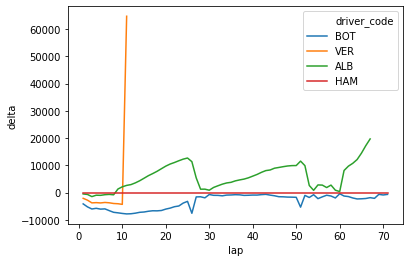

In [64]:
def load_race_laps(raceId):
    """return dataframe of all race laps with driver and race info"""
    laps = pd.read_csv('data/ergast_data/lap_times.csv')
    laps = laps[laps['raceId']==raceId]
    return laps

def load_drivers():
    return pd.read_csv('data/ergast_data/drivers.csv', parse_dates=['dob'])

def calc_total_milliseconds(df):
    df['total_milliseconds'] = df.groupby('driverId')['milliseconds'].cumsum()
    return df

def tgt_driver_delta(grp, tgt): 
    tgt_time = grp.loc[grp['driverId']==tgt, 'total_milliseconds'].to_numpy()[0]
    grp['delta'] = grp['total_milliseconds'] - tgt_time
    return grp

def plot_driver_deltas(raceId, tgt_driver, driver_ids=None,
                      driver_codes=None):
    laps = load_race_laps(raceId)
    laps = laps.sort_values('lap')
    laps = calc_total_milliseconds(laps)
    
    driver_id_dict = load_drivers().set_index('driverId')[['code']].to_dict()['code']
    laps['driver_code'] = laps['driverId'].map(driver_id_dict)
    
    if driver_ids:
        laps = laps[laps['driverId'].isin(driver_ids)]
    elif driver_codes:
        laps = laps[laps['driver_code'].isin(driver_codes)]
        
    
    # remove laps which targer driver did not complete
    laps = laps[laps['lap'] <= laps.loc[laps['driverId'] == tgt_driver, 'lap'].max()]
    
    # calculate delta from target driver each lap
    laps = laps.groupby('lap').apply(tgt_driver_delta, tgt_driver)
    
    sns.lineplot(data=laps, x='lap', y='delta', hue='driver_code')

    
plot_driver_deltas(1031, 1, driver_codes=['HAM', 'BOT', 'ALB'])